In [58]:
!pip install wordcloud

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATA_PATH = '/data/ephemeral/home/Korpora/nsmc/'
print('파일 크기 : ')
for file in os.listdir(DATA_PATH) :
    if 'txt' in file :
        print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+file) / 100000,2))+'MB')


파일 크기 : 
ratings_train.txt             146.29MB
ratings_test.txt              48.93MB


In [59]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [60]:
print('학습데이터 전체 개수: {}'.format(len(train_data)))

학습데이터 전체 개수: 150000


In [61]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

In [62]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


In [63]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

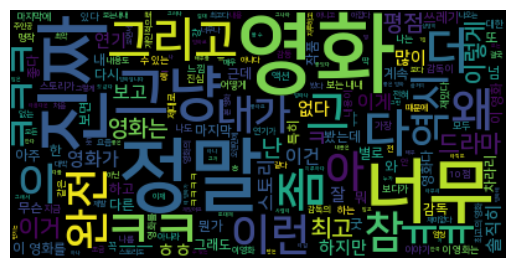

In [64]:
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud = WordCloud(DATA_PATH+'NANUMSQUAREB.TTF').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
#긍정 1, 부정 0
print('긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수: 74827
부정 리뷰 갯수: 75173


In [66]:
!pip install konlpy # 전처리(형태소 분석 등) 
!pip install jpype1

import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

train_data = pd.read_csv(DATA_PATH+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)

train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

#### 1.전처리 도와주는 함수

In [67]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

#### 2. 전체 학습데이터 및 평가데이터 리뷰 전처리

In [68]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [69]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

clean_test_review[:4]

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

#### 3. 문자 리뷰데이터를 인덱스 벡터로 변환

In [70]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

#### 4. 전처리 완료된 데이터 넘파이 파일로 저장

In [71]:
DEFAULT_PATH  = '/data/ephemeral/home/Korpora/nsmc/' # 경로지정
DATA_PATH = 'CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

#### [학습]

In [72]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = '/data/ephemeral/home/Korpora/nsmc/CLEAN_DATA/'
DATA_OUT = '/data/ephemeral/home/Korpora/nsmc/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

In [73]:
# 파라미터 세팅
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

In [74]:
# 모델 함수
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [75]:
# 학습
from tensorflow.keras.models import save_model

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'/.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

History = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])
# 모델 저장하기
save_model(model, checkpoint_path)

/data/ephemeral/home/Korpora/nsmc/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7463 - loss: 0.4996
Epoch 1: val_accuracy improved from -inf to 0.82593, saving model to /data/ephemeral/home/Korpora/nsmc/DATA_OUT/cnn_classifier_kr/.weights.h5
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.7464 - loss: 0.4993 - val_accuracy: 0.8259 - val_loss: 0.3819
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8758 - loss: 0.2971
Epoch 2: val_accuracy did not improve from 0.82593
264/264 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.8758 - loss: 0.2971 - val_accuracy: 0.8239 - val_loss: 0.4025
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9328 - loss: 0.1783
Epoch 3: val_accuracy did not improve from 0.82593
264/264 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - accuracy: 0.9328 - loss: 0.1783 - val_accuracy: 0.8213 - val_loss: 0.4654


#### [평가]

In [76]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('/data/ephemeral/home/Korpora/nsmc/DATA_OUT/cnn_classifier_kr/.weights.h5')
model.evaluate(test_input, test_label_data)

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 6 objects could not be loaded. Example error message for object <Conv1D name=conv1d_36, built=True>:

Layer 'conv1d_36' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Conv1D name=conv1d_36, built=True>, <Conv1D name=conv1d_37, built=True>, <Conv1D name=conv1d_38, built=True>, <Embedding name=embedding_12, built=True>, <Dense name=dense_24, built=True>, <Dense name=dense_25, built=True>]

#### [예측]

In [ ]:
DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('/data/ephemeral/home/Korpora/nsmc/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('/data/ephemeral/home/Korpora/nsmc/DATA_OUT/cnn_classifier_kr/.weights.h5') #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])

if(predictions > 0.5):
  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
else:
  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))

ValueError: A total of 6 objects could not be loaded. Example error message for object <Conv1D name=conv1d_27, built=True>:

Layer 'conv1d_27' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Conv1D name=conv1d_27, built=True>, <Conv1D name=conv1d_28, built=True>, <Conv1D name=conv1d_29, built=True>, <Embedding name=embedding_9, built=True>, <Dense name=dense_18, built=True>, <Dense name=dense_19, built=True>]